**PART A (SLR) [20 pts]**

Create two separate Models Using the Python Jupyter Notebook to investigate the above two research questions as follows.


Step 1: import all our standard libraries. Also include seaborn
	
  Import seaborn as sns


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

1.	Load the CSV file into a dataframe df
2.	Explore the top 5 rows of this dataframe 



In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_3/Birthweight_reduced.csv')
df.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


3.	How many rows and columns does it have?

In [3]:
df.shape

(42, 17)

4.	See all the columns this dataset has

In [4]:
df.columns

Index(['id', 'headcirumference', 'length', 'Birthweight', 'Gestation',
       'smoker', 'motherage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs',
       'fnocig', 'fheight', 'lowbwt', 'mage35', 'LowBirthWeight'],
      dtype='object')

Step 2: Using seaborn visualize the pairplots between 'headcirumference', 'length', 'Birthweight', 'mppwt', 'mheight'

In [5]:
# select target cols
cols = df.columns.to_list()
target_cols = cols[1:4] + cols[8:10]
print(target_cols)

['headcirumference', 'length', 'Birthweight', 'mheight', 'mppwt']


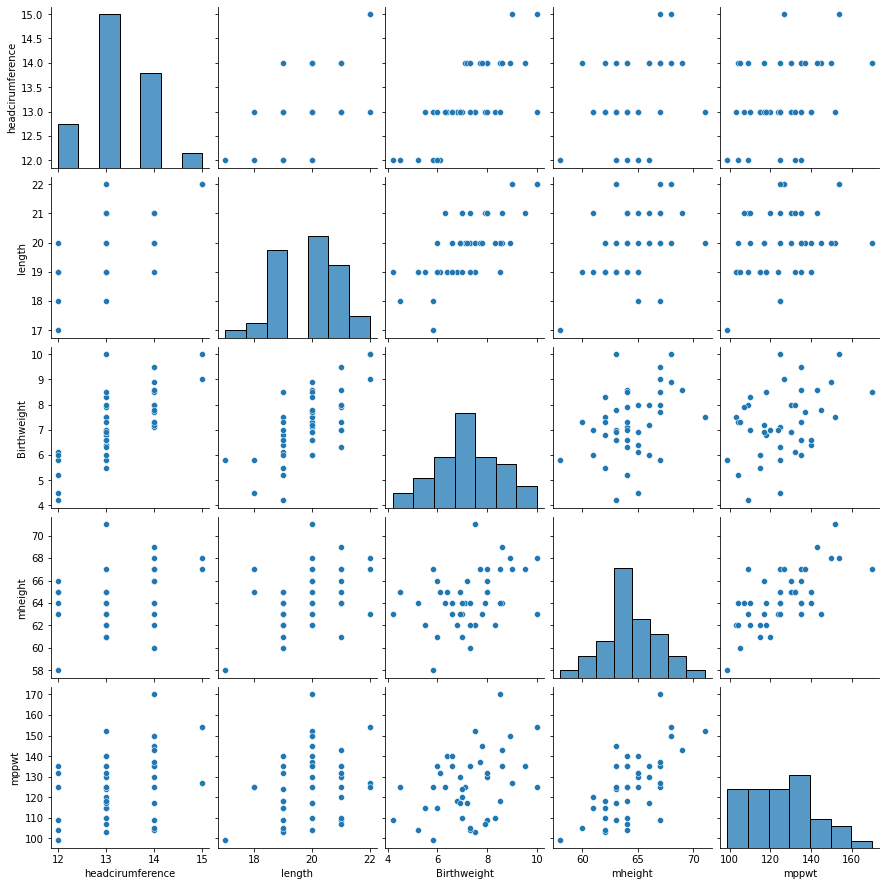

In [6]:
# plot ['headcirumference', 'length', 'Birthweight', 'mheight', 'mppwt'] to sns pairplot
sns.pairplot(df[target_cols],markers=["o", "s"])

Comment of what kind of relationship do you see from the plots?


    The BirthWeight has some relationship with mppwt and mheight, because their scatter plots don't plot in one direction. Also, the mheight has some relationship with mppwt, I will need to investigate more on these data to get more findings.

Step 3: compute the correlations of all these variables. Then show a heatmap of the correlations.

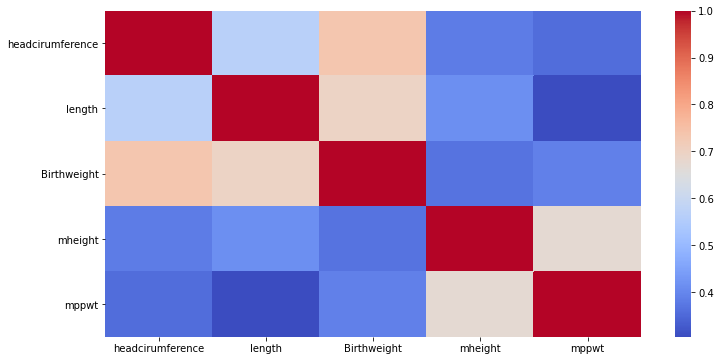

In [7]:
corr = df[target_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')

Step 4: You will now develop two SLR Models to answer to the two research questions

Step 5: Constructing the training and testing sets for the 2 SLR.

1.	Research question# 1, configure the attribute “mppwt” as predictor(independent) variable and “Birthweight” outcome (dependent) variable. 


In [8]:
X_mmpwt = df.iloc[:,9:10].values #mmpwt as independent
y_bw = df.iloc[:,3].values #birthweight as dependent

In [9]:
# train test split 
X_mmpwt_train, X_mmpwt_test, y_bw_train, y_bw_test = train_test_split(X_mmpwt,y_bw,test_size = 0.2, random_state=1)
lr = LinearRegression()
lr.fit(X_mmpwt_train, y_bw_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(lr.intercept_)

2.07442059205579


In [11]:
print(lr.coef_)

[0.04247154]


In [12]:
y_bw_pred = lr.predict(X_mmpwt_test) #use model to predict on test dataset

# compare the result
s1 = "{0:<9} | {1:<9}".format("Predicted","Answer")
s2 = "{0:<9} | {1:<9}".format("---------","-------")
print(s1)
print(s2)
for p, a in zip( y_bw_pred, y_bw_test):
    s = "{0:<9} | {1:<9}".format(round(p,2),round(a,2))
    print(s)

Predicted | Answer   
--------- | -------  
7.38      | 4.5      
8.02      | 6.4      
7.6       | 6.9      
7.38      | 10.0     
9.29      | 8.5      
7.81      | 6.0      
8.53      | 7.5      
7.04      | 6.9      
7.17      | 7.0      


In [13]:
# predict on train dataset and plot the graph
mmpwt_x_pred = lr.predict(X_mmpwt_train)

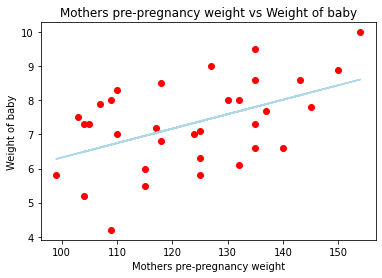

In [14]:
plt.scatter(X_mmpwt_train,y_bw_train,color='red') # plot the scatter data in red
plt.plot(X_mmpwt_train,mmpwt_x_pred,color='lightblue') # plot the regression line
plt.title('Mothers pre-pregnancy weight vs Weight of baby')
plt.xlabel('Mothers pre-pregnancy weight')
plt.ylabel('Weight of baby')
plt.show()

2.	Research question# 2, configure the attribute “mheight” as predictor(independent) variable and “Length” outcome (dependent) variable

In [15]:
X_mh = df.iloc[:,8:9].values # select mother height
y_le = df.iloc[:,2].values # select baby legnth

In [16]:
# train test split data
X_mh_train, X_mh_test, y_le_train, y_le_test = train_test_split(X_mh,y_le,test_size = 0.2, random_state=1)
lr_two = LinearRegression()
lr_two.fit(X_mh_train,y_le_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(lr_two.intercept_)

1.636701797892119


In [18]:
print(lr_two.coef_)

[0.28456293]


In [19]:
y_le_pred = lr_two.predict(X_mh_test) #use model to predict on test dataset

# compare the result
s1 = "{0:<9} | {1:<9}".format("Predicted","Answer")
s2 = "{0:<9} | {1:<9}".format("---------","-------")
print(s1)
print(s2)
for p, a in zip( y_le_pred, y_le_test):
    s = "{0:<9} | {1:<9}".format(round(p,2),round(a,2))
    print(s)

Predicted | Answer   
--------- | -------  
20.13     | 18       
20.13     | 19       
20.13     | 20       
19.56     | 22       
20.7      | 20       
20.42     | 20       
21.84     | 20       
19.56     | 20       
19.0      | 21       


In [20]:
mh_x_pred = lr_two.predict(X_mh_train)

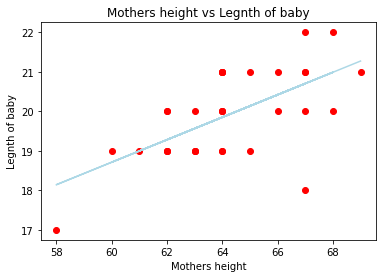

In [21]:
plt.scatter(X_mh_train,y_le_train,color='red') # plot the scatter data in red
plt.plot(X_mh_train,mh_x_pred,color='lightblue') # plot the regression line
plt.title('Mothers height vs Legnth of baby')
plt.xlabel('Mothers height')
plt.ylabel('Legnth of baby')
plt.show()

**Research question:**
1.	Check if baby birthweight is dependent upon mother’s pre-pregnancy weight

  ```In these two variables, I get the coefficient of 0.04, which is smaller than 0.1. It is a statistically significant result. Hence, I can conclude the baby's height is dependent on the mother's pre-pregnancy weight. When a mother's pre-pregnancy weight is heavier, the baby born tends to have a heavier weight. ```

2.	Check if the baby length is dependent upon mother's height

  ```Using the baby length and mother's height as dependent and independent variables, I got the coefficient of 0.28. It is more significant than 0.1, so it is not statistically significant. Hence, the baby's length doesn't depend on the mother's height. There isn't a relationship between these two variables. Also, from the data point, I can see the same result. When mother's height from 60 to 65 inches, they could all born the baby with 19 inches long. Similiar data as the baby length from 20 to 22. Therefore, I think the baby's length isn't dependent on the mother's height```


**PART B  [20 pts]**

Step 1: Some data cleanup may be necessary. 

Let us go ahead and drop the features “id
”, “LowBirthWeight”, and “lowbwt”.


In [22]:
df.shape

(42, 17)

In [23]:
df.drop(columns = ['id', 'LowBirthWeight','lowbwt'], inplace=True)

Verify that these columns are now gone. 

In [24]:
df.shape #reduced from 17 columns to 14 colums

(42, 14)

Step 2: Setup your X matrix with all the independent variables left and your target of prediction is “Birthweight” which goes to y matrix.

In [25]:
X_mr = df.iloc[:,:].drop('Birthweight', axis = 1)
y_mr = df.loc[:,'Birthweight']

Step 3: Split your data set into training and testing with a split ratio of 75:25. 

In [26]:
X_mr_train, X_mr_test, y_mr_train, y_mr_test = train_test_split(X_mr, y_mr, test_size = 0.75, random_state=1)

Step 4: After importing the necessary Linear Regression libraries, create and fit your model. 

In [27]:
lr_mr = LinearRegression()
lr_mr.fit(X_mr_train, y_mr_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Step 5: Print your intercept value. What do you find here?

In [28]:
print(lr_mr.intercept_)

-2.5279882767649884


The slope is negative!

Step 6: Print all your coefficients. You will see this as an array.

In [29]:
print(lr_mr.coef_)

[ 0.02514663 -0.13890075  0.54237973 -0.0119058   0.05059697 -0.086406
  0.08612056 -0.02159783 -0.02632345  0.08747461  0.01659525 -0.18632285
  0.        ]


Step 7: Make your predictions. Remember you provide X_test data now. 

In [30]:
y_mr_pred = lr_mr.predict(X_mr_test)

Step 8: Check your prediction value with actual real values. 

In [31]:
# compare the result
s1 = "{0:<9} | {1:<9}".format("Predicted","Answer")
s2 = "{0:<9} | {1:<9}".format("---------","-------")
print(s1)
print(s2)
for p, a in zip( y_mr_pred, y_mr_test):
    s = "{0:<9} | {1:<9}".format(round(p,2),round(a,2))
    print(s)

Predicted | Answer   
--------- | -------  
6.61      | 4.5      
5.44      | 6.4      
8.77      | 6.9      
10.15     | 10.0     
5.78      | 8.5      
4.91      | 6.0      
5.6       | 7.5      
8.76      | 6.9      
8.41      | 7.0      
7.55      | 9.5      
8.81      | 8.3      
6.8       | 7.8      
8.29      | 7.3      
6.17      | 7.0      
9.23      | 9.0      
9.04      | 7.3      
8.61      | 8.0      
3.0       | 5.8      
7.66      | 6.6      
7.26      | 8.6      
9.71      | 8.9      
8.52      | 7.2      
7.12      | 7.9      
7.54      | 10.0     
6.16      | 6.0      
6.17      | 5.5      
5.97      | 7.7      
6.19      | 5.2      
7.32      | 8.0      
5.14      | 7.0      
5.58      | 6.1      
8.97      | 8.5      


Do a scatter plot to see how they align. 

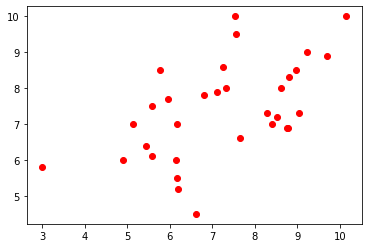

In [32]:
# do I need to add X&y label here?
plt.scatter(y_mr_pred, y_mr_test,color='red')
plt.show()

Step 9: Show the values MAE, MSE, RMSE


In [33]:
print('MAE')
metrics.mean_absolute_error(y_mr_test, y_mr_pred)

MAE


1.2363229696756557

In [34]:
print('MSE')
metrics.mean_squared_error(y_mr_test, y_mr_pred)

MSE


2.043332289407223

In [35]:
print('RMSE')
np.sqrt(metrics.mean_squared_error(y_mr_test, y_mr_pred))

RMSE


1.4294517443436918

**Research question:**

In this part, we like to investigate which other variables are significant in predicting the birthweight? Also, check how close your prediction is to actual values?


In [36]:
count = 0
for i in list(lr_mr.coef_):
  if -0.1<i<0.1:
    count += 1

print(f"Out of {len(lr_mr.coef_)} features, there are {count} features are statisically significant")

Out of 13 features, there are 10 features are statisically significant
